# Advanced Classification Predict

In [107]:
import comet_ml

In [108]:
# comet
from comet_ml import Experiment

In [109]:
experiment = Experiment(api_key= 'nMFyxVc83DoLqA49L7VFRRs6w', project_name = 'Classification_AE1')

ImportError: You must import Comet before these modules: sklearn

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import nltk
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


# Accuracy Scores
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import metrics

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Data Cleaning
import emoji
from bs4 import BeautifulSoup
import re
import itertools
import string

# Any results you write to the current directory are saved as output.

In [134]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [135]:
train_data = train.copy()

In [136]:
train_data.shape, test.shape

((15819, 3), (10546, 2))

In [137]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [138]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [139]:
train_data.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [140]:
train_data['message'].value_counts()


RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoNÃ¢â‚¬Â¦    307
RT @SenSanders: We have a president-elect who doesn't believe in climate change. Millions of people are going to have to say: Mr. TÃ¢â‚¬Â¦            130
RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦     73
RT @BernieSanders: #ImVotingBecause the future of the planet is at stake. Hillary Clinton will combat climate change. Donald Trump thinks iÃ¢â‚¬Â¦     59
RT @SethMacFarlane: HRC proposes installing half a billion solar panels by the end of her first term. Trump thinks climate change is a hoaxÃ¢â‚¬Â¦     56
                                                                                                                                                     ... 
@Minimadden @MollyTov_CkTail Well I can not speak to the origins of the glob

In [141]:
working_df = train.copy()
# Labeling the target
working_df['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in working_df['sentiment']]

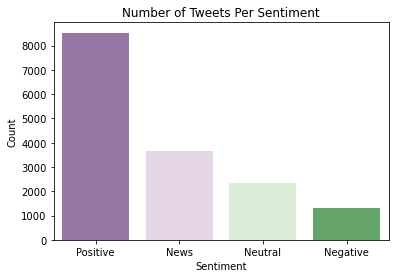

In [142]:
sns.countplot(x='sentiment' ,data = working_df, palette='PRGn')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.title('Number of Tweets Per Sentiment')

plt.show()

Class Imbalance

## Try remove news

For our model to be to predict the sentiment of a tweet or a retweet of news, it needs to learn from and classify based on sentiments. For this reason, we have dropped the news. 

In [143]:
train_data = train_data[train_data.sentiment != 2]

In [144]:
sentiments_list = list(train_data.sentiment.unique())
print(sentiments_list)

[1, 0, -1]


## Text Cleaning 

In [145]:
def load_dict_smileys():
    
    return {
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }


In [146]:
def load_dict_contractions():
    
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks"
        }

In [147]:
train_data.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577


In [148]:
#cleaning the data

def drop_features(features,data):
    data.drop(features,inplace=True,axis=1)

In [149]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
train_data['message'] = train_data['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [150]:
import re
## example ## 
re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ","ouch...junior is angryð#got7 #junior #yugyo..., @user")

'ouch   junior is angry     got7  junior  yugyo      '

In [151]:
def strip_accents(text):
    if 'ø' in text or  'Ø' in text:
        #Do nothing when finding ø 
        return text   
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)
def tweet_cleaning_for_sentiment_analysis(tweet):    
    
    #Lower case
    tweet = tweet.lower()
    #CONTRACTIONS source: https://en.wikipedia.org/wiki/Contraction_%28grammar%29
    CONTRACTIONS = load_dict_contractions()
    tweet = tweet.replace("’","'")
    words = tweet.split()
    reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
    tweet = " ".join(reformed)
    #Escaping HTML characters
    tweet = BeautifulSoup(tweet).get_text()
    #Special case not handled previously.
    tweet = tweet.replace('\x92',"'")
    #Removal of hastags/account
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ", tweet).split())
    #Removal of address
    tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split())
    #Removal of Punctuation
    tweet = ''.join([l for l in tweet if l not in string.punctuation])
    # Standardizing words
    tweet = ''.join(''.join(s)[:2] for _, s in itertools.groupby(tweet))
    #Deal with smileys
    #source: https://en.wikipedia.org/wiki/List_of_emoticons
    SMILEY = load_dict_smileys()  
    words = tweet.split()
    reformed = [SMILEY[word] if word in SMILEY else word for word in words]
    tweet = " ".join(reformed)
    #Deal with emojis
    tweet = emoji.demojize(tweet)
    #Strip accents
    tweet= strip_accents(tweet)
    tweet = tweet.replace(":"," ")
    tweet = ' '.join(tweet.split())
    return tweet

In [152]:
train_data['processed_tweets'] = train_data['message'].apply(tweet_cleaning_for_sentiment_analysis)

In [153]:
train_data.head(10)

,sentiment,message,tweetid,processed_tweets
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief does not think carbon d...
1,1,It's not like we lack evidence of anthropogeni...,126103,it is not like we lack evidence of anthropogen...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,todayinmaker wired 2016 was a pivotal year in ...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,rt it is 2016 and a racist sexist climate chan...
5,1,Worth a read whether you do or don't believe i...,425577,worth a read whether you do or do not believe ...
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933,rt mike pence does not believe in global warmi...
7,1,RT @makeandmendlife: Six big things we can ALL...,992717,rt six big things we can all do today to fight...
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510,my 8yo nephew is inconsolable he wants to die ...
9,1,RT @paigetweedy: no offense… but like… how do ...,260471,rt no offense but like how do you just not bel...
10,1,RT @StephenSchlegel: she's thinking about how ...,295793,rt she is thinking about how she is going to d...


In [154]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12179 entries, 0 to 15818
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sentiment         12179 non-null  int64 
 1   message           12179 non-null  object
 2   tweetid           12179 non-null  int64 
 3   processed_tweets  12179 non-null  object
dtypes: int64(2), object(2)
memory usage: 475.7+ KB


Let's lemmatize all of the words in the MBTI dataframe.

In [155]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

In [156]:
tokeniser = TreebankWordTokenizer()
train_data['tokens'] = train_data['processed_tweets'].apply(tokeniser.tokenize)

In [157]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def data_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]    

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\msntu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [158]:
train_data['lemma'] = train_data['tokens'].apply(data_lemma, args=(lemmatizer, ))

In [159]:
train_data.head()

,sentiment,message,tweetid,processed_tweets,tokens,lemma
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief does not think carbon d...,"[polyscimajor, epa, chief, does, not, think, c...","[polyscimajor, epa, chief, doe, not, think, ca..."
1,1,It's not like we lack evidence of anthropogeni...,126103,it is not like we lack evidence of anthropogen...,"[it, is, not, like, we, lack, evidence, of, an...","[it, is, not, like, we, lack, evidence, of, an..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,todayinmaker wired 2016 was a pivotal year in ...,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[todayinmaker, wired, 2016, wa, a, pivotal, ye..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,rt it is 2016 and a racist sexist climate chan...,"[rt, it, is, 2016, and, a, racist, sexist, cli...","[rt, it, is, 2016, and, a, racist, sexist, cli..."
5,1,Worth a read whether you do or don't believe i...,425577,worth a read whether you do or do not believe ...,"[worth, a, read, whether, you, do, or, do, not...","[worth, a, read, whether, you, do, or, do, not..."


In [160]:
drop_features(['tweetid','message'],train_data)

### Resampling

In [161]:
from sklearn.utils import resample

In [162]:
class_size = int(len(train_data[train_data['sentiment']==1])/2)

In [163]:
# seperating the four classes
class_1 = train_data[train_data['sentiment']==-1]
class_2 = train_data[train_data['sentiment']==0]
class_3 = train_data[train_data['sentiment']==1]
#class_4 = train_data[train_data['sentiment']==2]

In [164]:
# upsampling classes 1, 2, and 4 & downsampling class 3
class_1_up = resample(class_1,replace=True,n_samples=class_size, random_state=27)
class_2_up = resample(class_2,replace=True,n_samples=class_size, random_state=27)
#class_4_up = resample(class_4,replace=True,n_samples=class_size, random_state=27)
class_3_down = resample(class_3,replace=False,n_samples=class_size, random_state=27)


In [165]:
# Creating a new DataFrame out of the balanced bata
resampled_df = pd.concat([class_1_up, class_2_up, class_4_up,class_3_down])

In [166]:
working_df_2 = resampled_df.copy()
# Labeling the target
working_df_2['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in working_df_2['sentiment']]

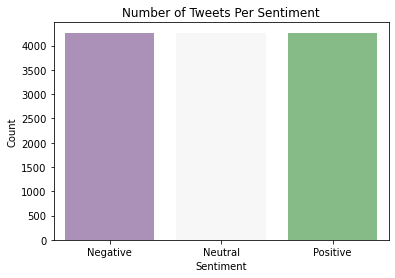

In [167]:
sns.countplot(x='sentiment' ,data = working_df_2, palette='PRGn')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.title('Number of Tweets Per Sentiment')

plt.show()

## Feature Extraction

### Bag of Words


In [168]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [169]:
sentiments = {}
for sent in sentiments_list:
    df = train_data.groupby('sentiment')
    sentiments[sent] = {} # make the personality type the main key
    for row in df.get_group(sent)['tokens']: # gets the pp group and its tokens
        sentiments[sent] = bag_of_words_count(row, sentiments[sent]) # gives bag of ords for each personality 

In [170]:
all_words = set()
for sent in sentiments_list:
    for word in sentiments[sent]: #getting the word in bag of words for a personality type
        all_words.add(word)

In [171]:
sentiments['all'] = {}
for sent in sentiments_list:    
    for word in all_words:
        if word in sentiments[sent].keys():
            if word in sentiments['all']:
                sentiments['all'][word] += sentiments[sent][word]
            else:
                sentiments['all'][word] = sentiments[sent][word]

In [172]:
total_words = sum([v for v in sentiments['all'].values()])
total_words

224078

In [173]:
rare_words = [k for k, v in sentiments['all'].items() if v<= 2] 
print(rare_words[:100])

['amsa2017', 'makessense', 'wolverine', 'reliefweb', 'escaping', 'futurology', 'ilmasto', 'staffed', 'blatantly', 'loved', 'outcast', 'sma', 'memorize', 'pining', 'halting', 'anatiala', 'horsemen', 'deer', 'lays', 'followers', 'converting', 'spite', 'troubled', 'dec', 'cup', 'rehab', 'heterosexual', 'spike', 'adaptaion', 'sixty', 'outlier', 'behave', 'biblical', 'washpost', 'erupt', 'crispr', 'collectively', 'dismissing', 'braved', 'scientificstudies', 'yearly', 'facists', 'skate', 'lyly', 'priceoncarbon', 'withnatur', 'cosying', 'oslo', 'bozeman', 'hurrican', 'cop23', 'consecutive', 'saeen', 'transported', 'residential', 'looads', 'trashed', 'southafrica', 'stroop', 'climatec', 'treatable', 'wante', 'flattered', 'soak', 'ladies', 'environments', 'miuigation', 'weindorf', 'compact', 'demolishes', 'administrations', 'midlands', 'disagreeing', 'niche', 'grace', 'jamaicans', 'pdx', 'thts', 'considerably', 'maue', 'bradley', 'midst', 'substantially', 'lorenzo', 'argentinian', 'greenbondsng

In [174]:
# how many words appear more than 10 times?
# how many words of the total does that account for?
print(len([v for v in sentiments['all'].values() if v > 1]))
occurs_more_than_10_times = sum([v for v in sentiments['all'].values() if v >1 ])
print(occurs_more_than_10_times)

6844
216340


In [175]:
occurs_more_than_10_times/total_words

0.9654673818938049

### Selection by Variance Thresholding

Variance thresholding is a process by which we remove features which don't meet some minimum level of variance.

This did not improve the results


### Selection by K-Best Features

SelectKBest is a feature selection module in sklearn which removes all but the k highest scoring features according to some specified statistical test. In this case, we'll use f_classif as the test, which we specify in the score_func argument in the SelectKBest method.

In [176]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(resampled_df["processed_tweets"], resampled_df["sentiment"], test_size = 0.2, random_state = 42)


In [177]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
#stopwords= set(ENGLISH_STOP_WORDS)
#stopwords.update(rare_words)
count_vect = CountVectorizer()
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [178]:
x_train_counts = count_vect.fit_transform(x_train)
#x_train_tfidf = transformer.fit_transform(x_train_counts)

In [179]:
print(x_train_counts.shape)
#print(x_train_tfidf.shape)

(10236, 10606)


In [180]:
x_test_counts = count_vect.transform(x_test)
#x_test_tfidf = transformer.transform(x_test_counts)

In [181]:
print(x_test_counts.shape)
#print(x_test_tfidf.shape)

(2559, 10606)


In [182]:
from sklearn.preprocessing import StandardScaler
    

scaler = StandardScaler(with_mean = False)
x_train_scaled = scaler.fit_transform(x_train_counts)
x_test_scaled = scaler.fit_transform(x_test_counts)


In [183]:
names = ['Logistic Regression', 'Nearest Neighbors', 
         'Linear SVM', 'RBF SVM',          
         'Decision Tree', 'Random Forest',  'AdaBoost']

In [184]:
classifiers = [
    LogisticRegression(n_jobs= 5,random_state=5), 
    KNeighborsClassifier(n_neighbors=5,n_jobs= 5),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),    
    AdaBoostClassifier()
]

In [185]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(x_train_scaled,y_train)
    
    print ('... predicting')
    y_pred = clf.predict(x_train_scaled)   
    y_pred_test = clf.predict(x_test_scaled)
    
    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='weighted')
    recall    = metrics.recall_score(y_train, y_pred, average='weighted')
    
    f1        = metrics.f1_score(y_train, y_pred, average='weighted')    
    f1_test   = metrics.f1_score(y_test, y_pred_test, average='weighted')    
    
    # Save the results to dictionaries
    models[name] = clf    
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting RBF SVM model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
... All done!


In [186]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
RBF SVM,0.999023,0.999024,0.999023,0.999023,0.179431,20.699959
Logistic Regression,0.998828,0.998828,0.998828,0.998828,0.823015,1.447852
Linear SVM,0.997558,0.997558,0.997558,0.997558,0.803825,11.476286
Nearest Neighbors,0.728996,0.791799,0.728996,0.702747,0.579720,0.001483
AdaBoost,0.614791,0.631252,0.614791,0.615301,0.610696,0.447043
Decision Tree,0.524424,0.530132,0.524424,0.516238,0.485985,0.034249
Random Forest,0.354924,0.603335,0.354924,0.219235,0.208952,0.022881


In [187]:
print(class_report['RBF SVM'])

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      3393
           0       1.00      1.00      1.00      3411
           1       1.00      1.00      1.00      3432

    accuracy                           1.00     10236
   macro avg       1.00      1.00      1.00     10236
weighted avg       1.00      1.00      1.00     10236



In [188]:
print(class_report ['Random Forest'])

              precision    recall  f1-score   support

          -1       0.67      0.05      0.09      3393
           0       0.34      0.99      0.51      3411
           1       0.80      0.03      0.07      3432

    accuracy                           0.35     10236
   macro avg       0.60      0.36      0.22     10236
weighted avg       0.60      0.35      0.22     10236



In [198]:
best_model= SVC(gamma=2, C=1)

**preparing for test data**

In [189]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


In [190]:
test['processed_tweet'] = test['message'].apply(tweet_cleaning_for_sentiment_analysis)

In [191]:
test.head()


,message,tweetid,processed_tweet
0,Europe will now be looking to China to make su...,169760,europe will now be looking to china to make su...
1,Combine this with the polling of staffers re c...,35326,combine this with the polling of staffers re c...
2,"The scary, unimpeachable evidence that climate...",224985,the scary unimpeachable evidence that climate ...
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,putin got to you too jill trump does not belie...
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,rt female orgasms cause global warming sarcast...


In [192]:
drop_features(['message'],test)

In [193]:
train_counts = count_vect.fit_transform(train_data['processed_tweets'])
test_counts = count_vect.transform(test['processed_tweet'])

In [194]:
print(train_counts.shape)
print(test_counts.shape)

(12179, 14547)
(10546, 14547)


In [195]:
#train_tfidf = transformer.fit_transform(train_counts)
#test_tfidf = transformer.transform(test_counts)

In [196]:

#print(train_tfidf.shape)
#print(test_tfidf.shape)


In [199]:
best_model.fit(train_counts,train_data['sentiment'])

SVC(C=1, gamma=2)

In [200]:
predictions = best_model.predict(test_counts)

In [201]:
final_result = pd.DataFrame({'tweetid':test['tweetid'],'sentiment':predictions})
final_result.to_csv('RBF7.csv',index=False)

In [202]:
final_result.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1
